## Importing all necessary Libraries

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Importing the dataset

In [2]:
data = pd.read_csv("Mall.csv")


In [3]:
data.info()
data.head()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data['Spending Score (1-100)'].value_counts().unique()

array([8, 7, 6, 5, 4, 3, 2, 1], dtype=int64)

## Preprocessing the data

In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Identifying the Relation between Customers

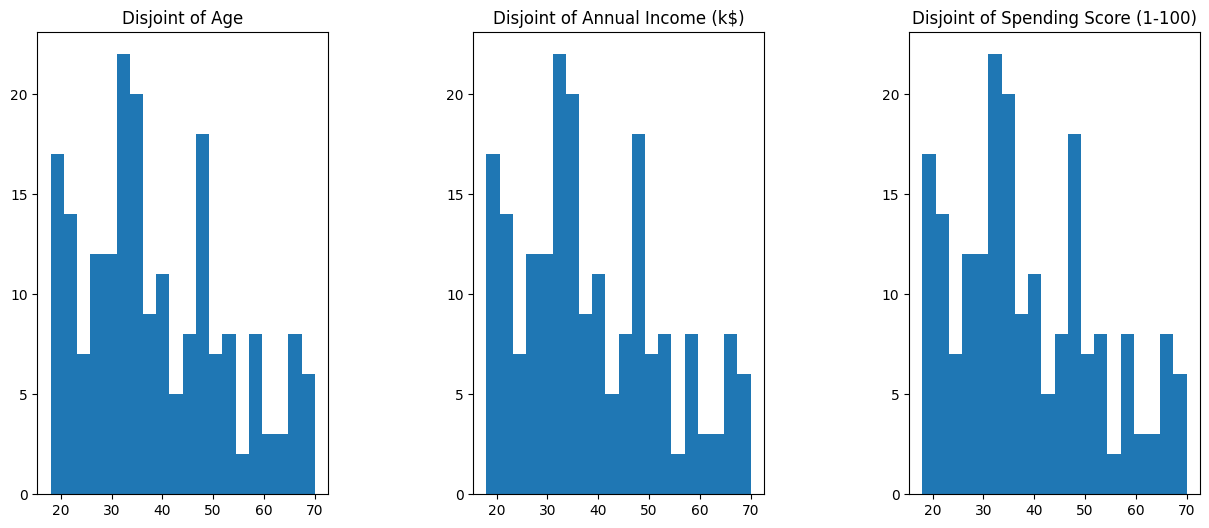

In [12]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    plt.hist(data['Age'], bins=20)
    #sns.displot(data[x], bins = 20)
    plt.title('Disjoint of {}'.format(x))
plt.show()

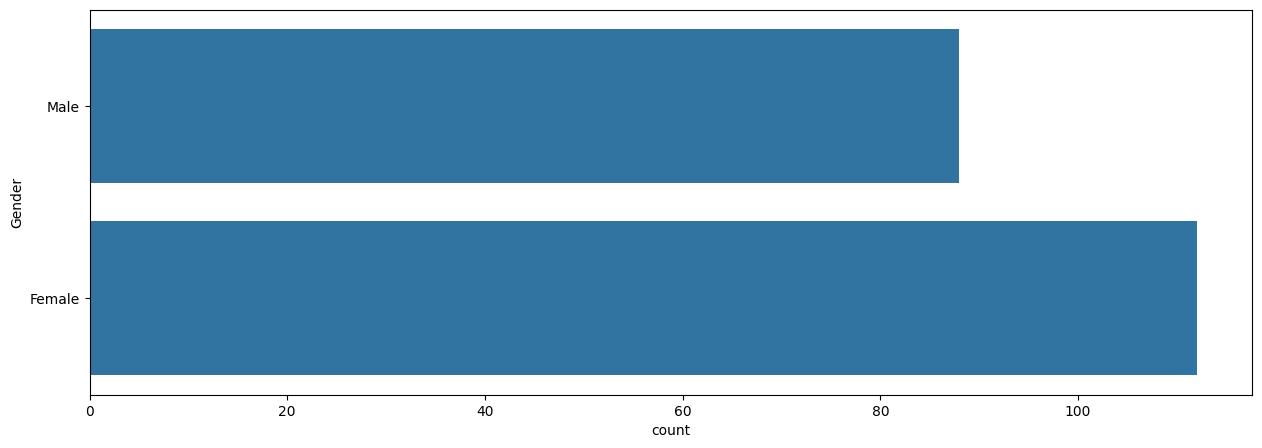

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=data)
plt.show()

## Identifying the Density of Customers for a particular Criteria

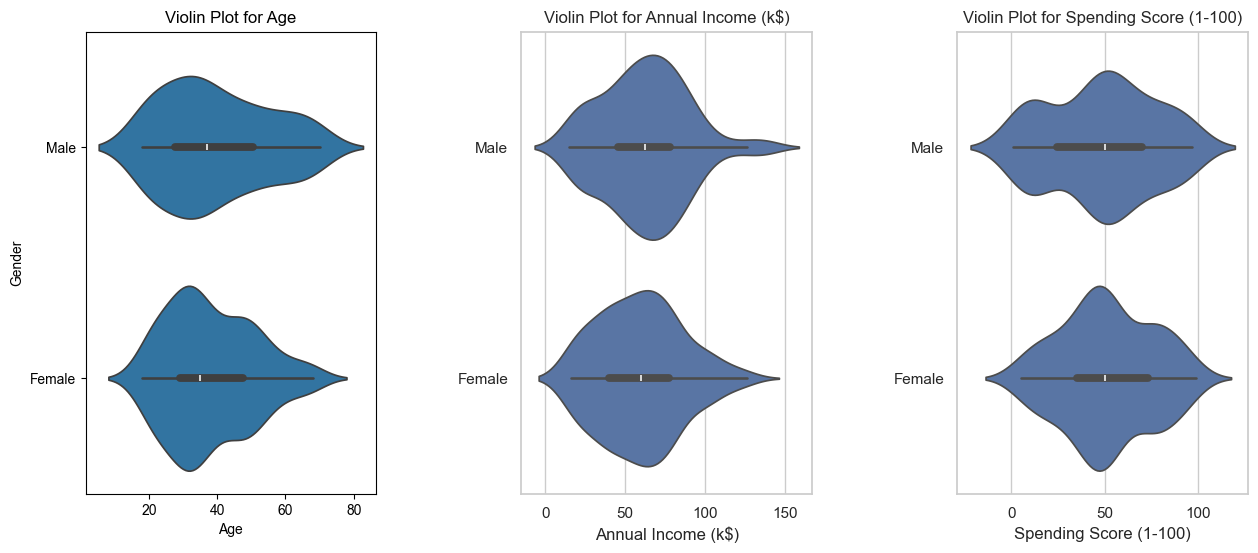

In [14]:
plt.figure(1, figsize=(15, 6))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=data[cols], y='Gender', data=data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title(f'Violin Plot for {cols}')

plt.show()

### From the above information we learned that Annual Income and Spending Score affect more.

### Therefore plotting the graph to show the relationship between them with semantic mappings of subsets.

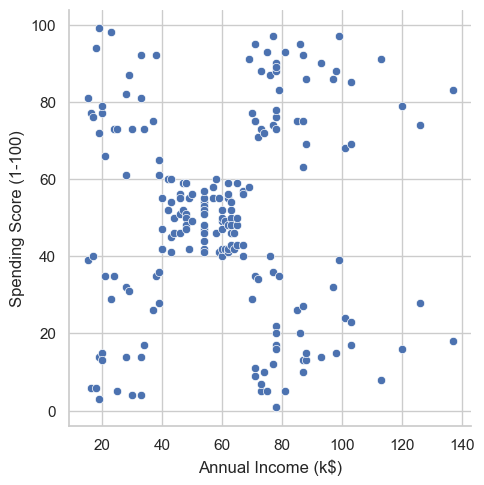

In [15]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)",data=data)

# Identifying the number of K for Kmeans model 

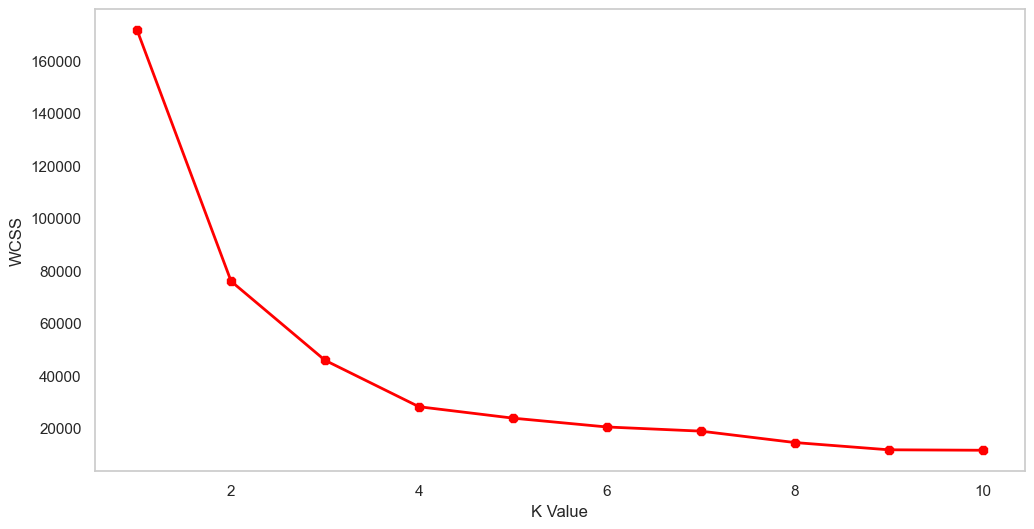

In [16]:
X1=data.loc[:, ["Age","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### As we saw the in the above graph that k=4 can be taken

In [17]:
kmeans =KMeans(n_clusters=4)
label= kmeans.fit_predict(X1)

print(label)

[0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 0 0 1 3 0 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1
 3 1 3 2 3 2 0 1 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 3 0 3 2 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 2 3
 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [18]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]]


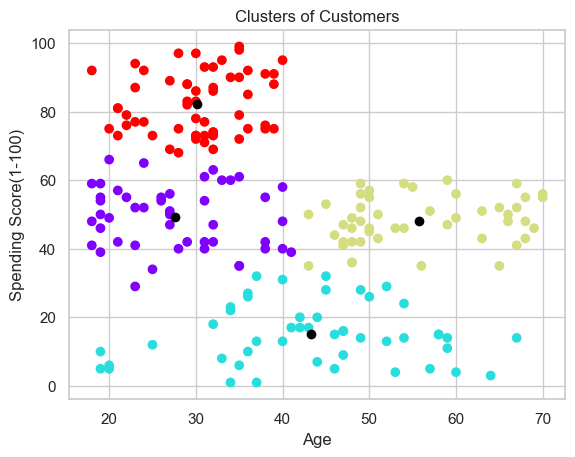

In [19]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

### The graph produced is not properly clustered to be judge

### Trying again with other variables

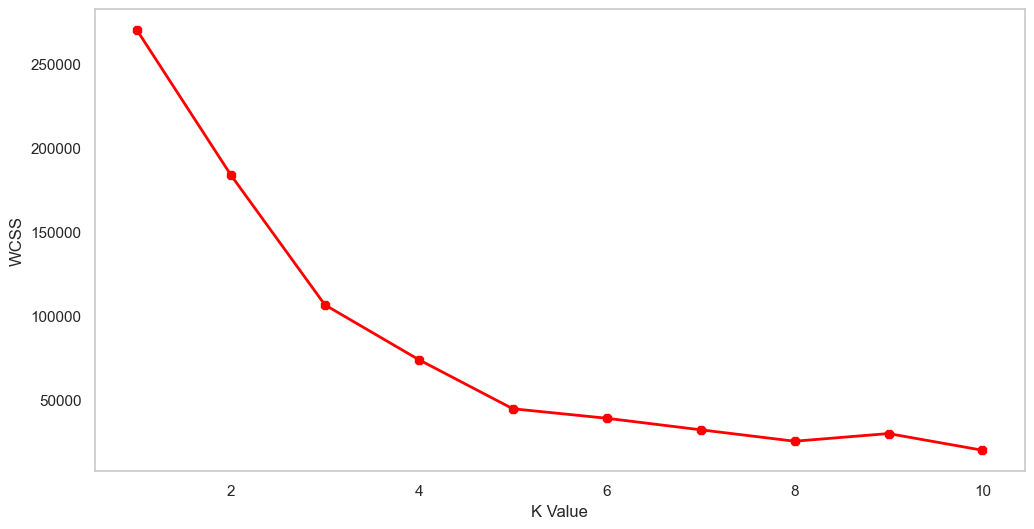

In [20]:
X2=data.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### Selecting K=5 from the above graph

In [21]:
kmeans =KMeans(n_clusters=5)
label= kmeans.fit_predict(X2)

print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [22]:
print(kmeans.cluster_centers_)

[[ 48.26        56.48      ]
 [ 86.53846154  82.12820513]
 [109.7         22.        ]
 [ 78.89285714  17.42857143]
 [ 26.30434783  20.91304348]]


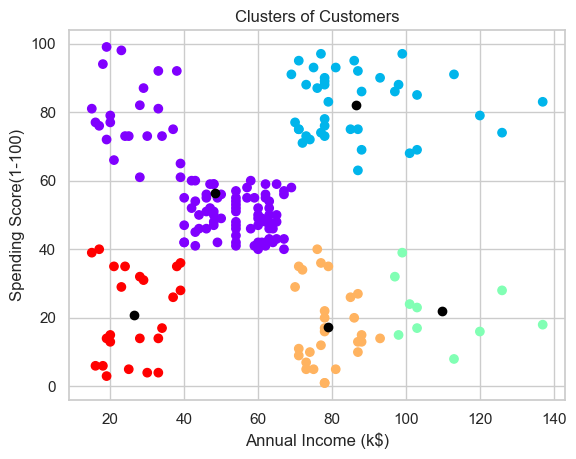

In [23]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

### Now we can see proper clustering of customers 

# Now we will consider all the variables 

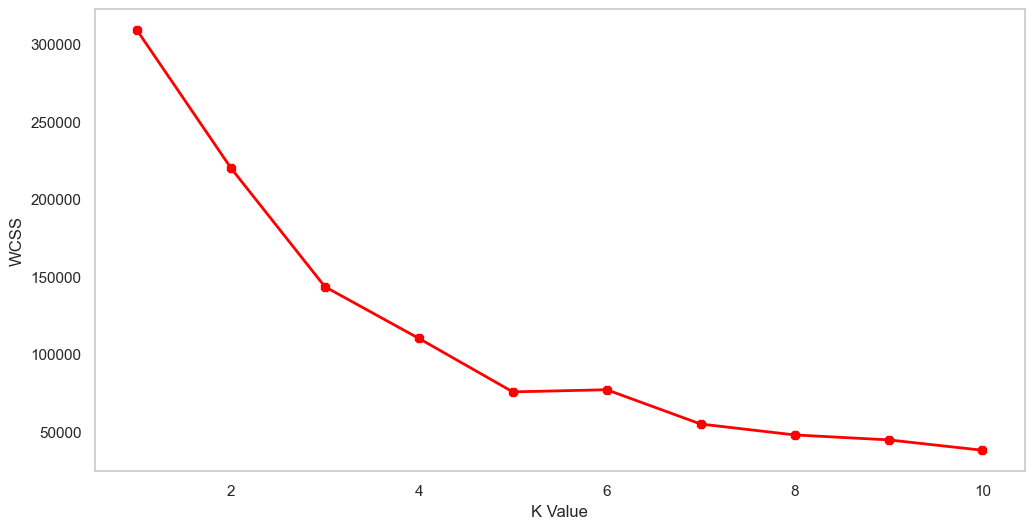

In [24]:
X3=data.iloc[:,1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init= "k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

### Selecting K=5 as later on it helps in the representation purpose

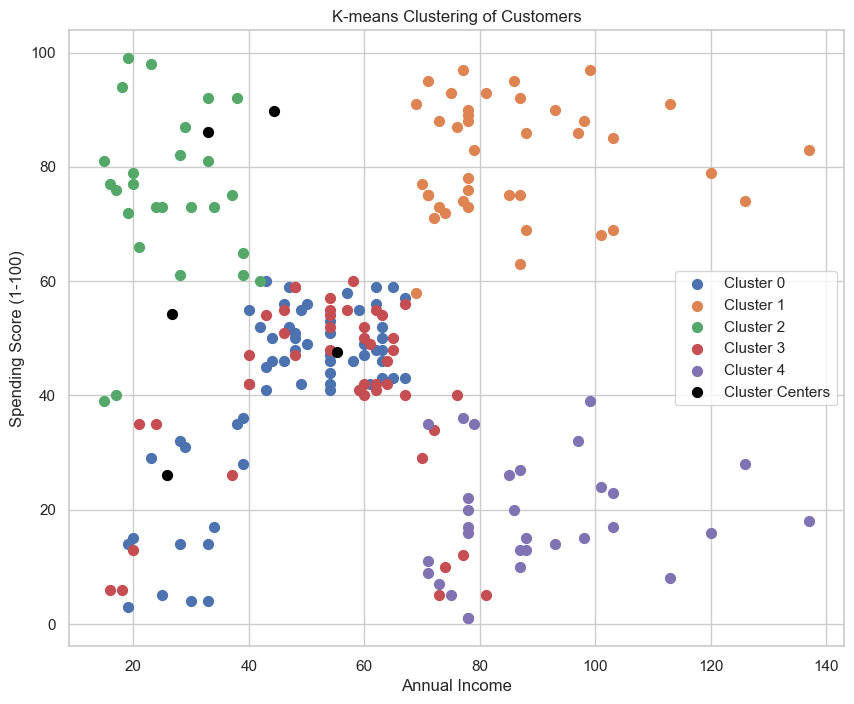

In [27]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=50, label=f'Cluster {cluster_label}')
plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1],
            c='black', marker='.', s=200, label='Cluster Centers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

plt.title('K-means Clustering of Customers')

plt.legend()
plt.show()




## Identifying the plotting to represent Clustering of Customers

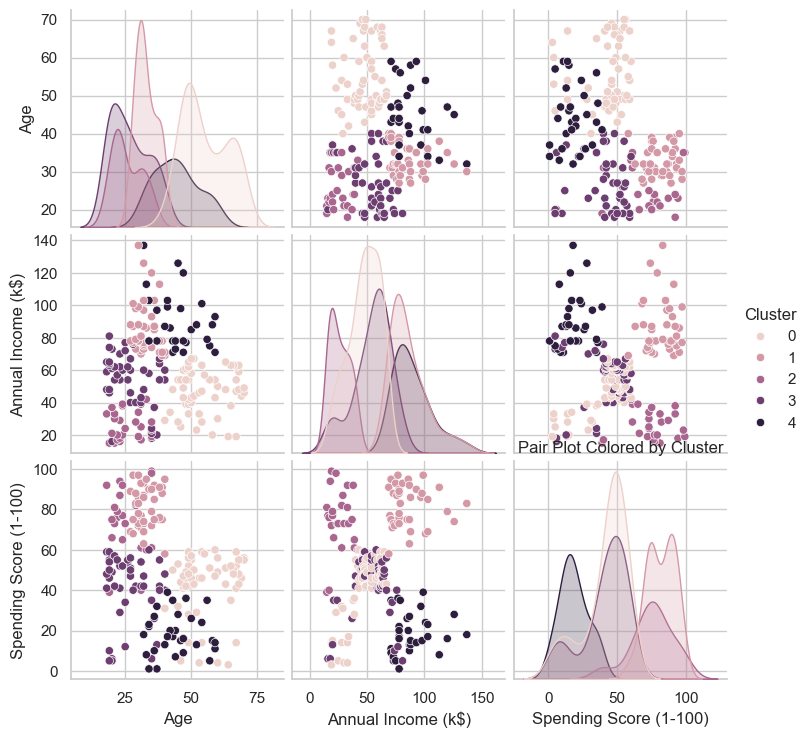

In [28]:
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(data=data,hue='Cluster', diag_kind='auto', vars=variables)
plt.title('Pair Plot Colored by Cluster')
plt.show()

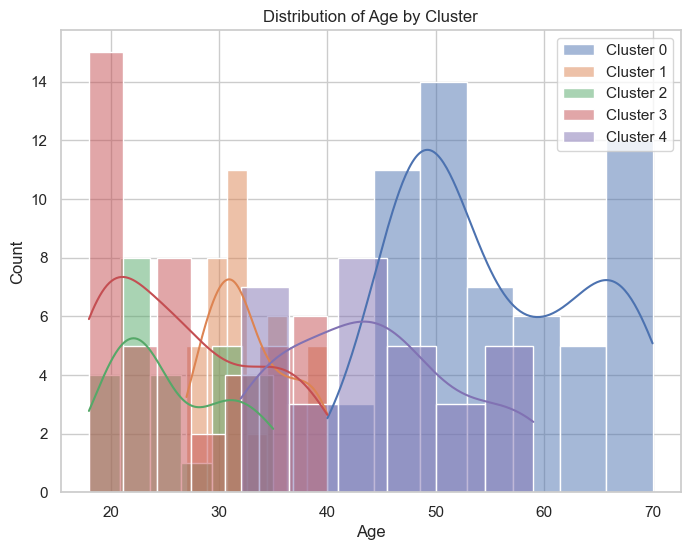

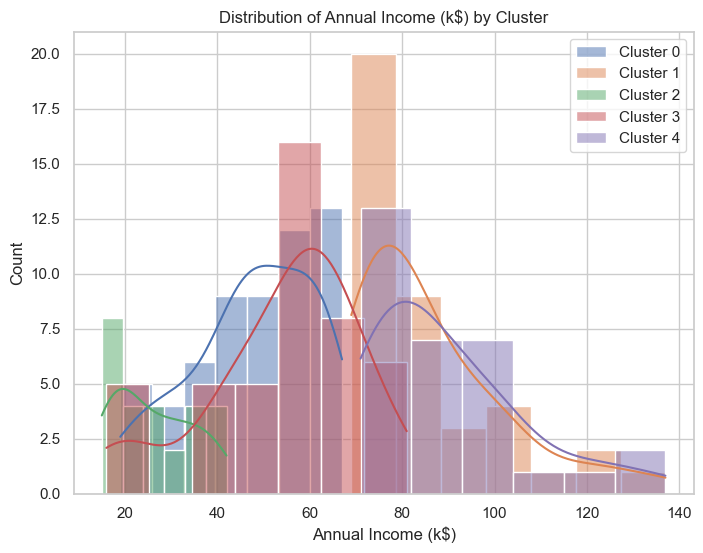

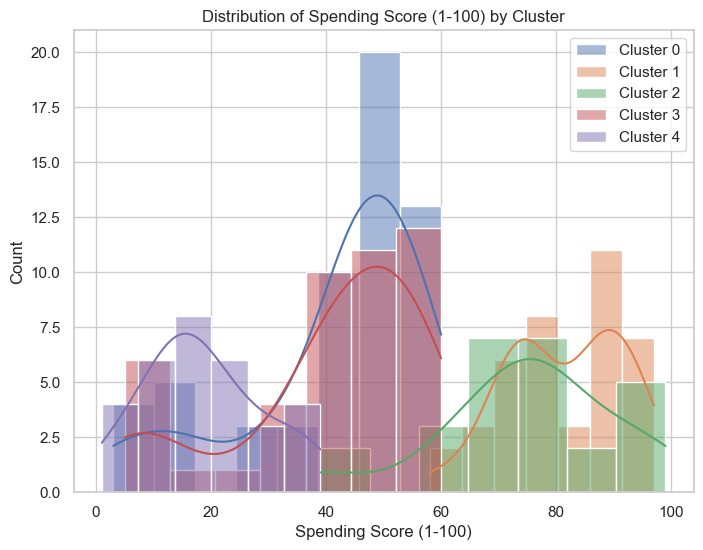

In [29]:
for feature in features:
    plt.figure(figsize=(8, 6))
    for cluster_id in range(num_clusters):
        cluster_data = data[data['Cluster'] == cluster_id]
        sns.histplot(cluster_data[feature], label=f'Cluster {cluster_id}', kde=True)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
    plt.show()


In [30]:
kmeans =KMeans(n_clusters=5)
label= kmeans.fit_predict(X3)

print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 1 3 1 3 4 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 1 3 1 1 1 1 1 3 1 1 3 3 1 1 3 1 1 1 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 1 3 3 3 1 1 1 1 3 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [31]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [53.71153846 54.42307692 48.73076923]
 [40.39473684 87.         18.63157895]
 [24.8        41.46       63.7       ]
 [44.14285714 25.14285714 19.52380952]]


# Representation of Clusters in 2D and 3D form

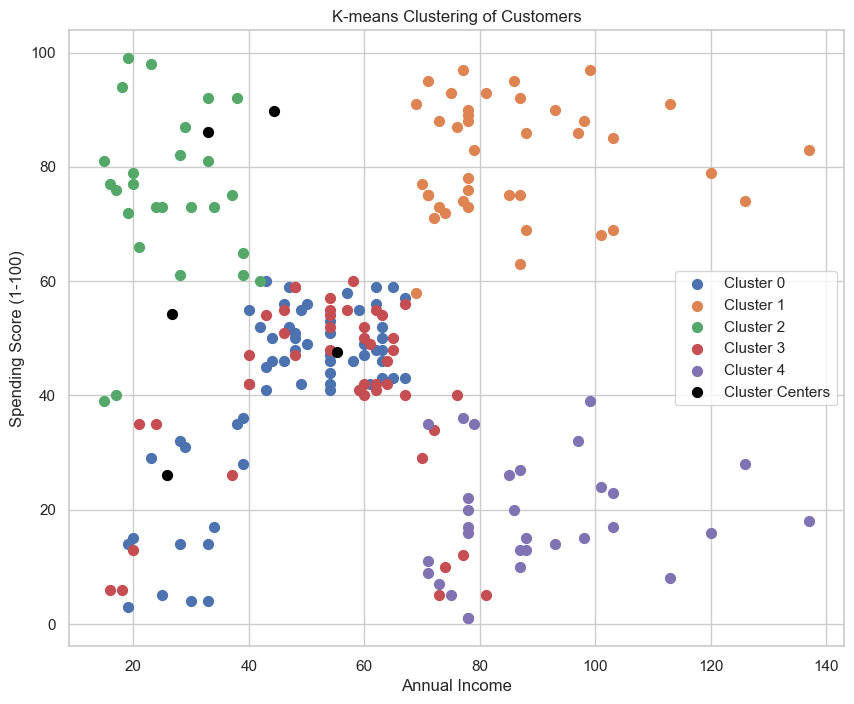

In [32]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                s=50, label=f'Cluster {cluster_label}')


plt.scatter(cluster_centers_original[:, 0], cluster_centers_original[:, 1],
            c='black', marker='.', s=200, label='Cluster Centers')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

plt.title('K-means Clustering of Customers')

plt.legend()
plt.show()

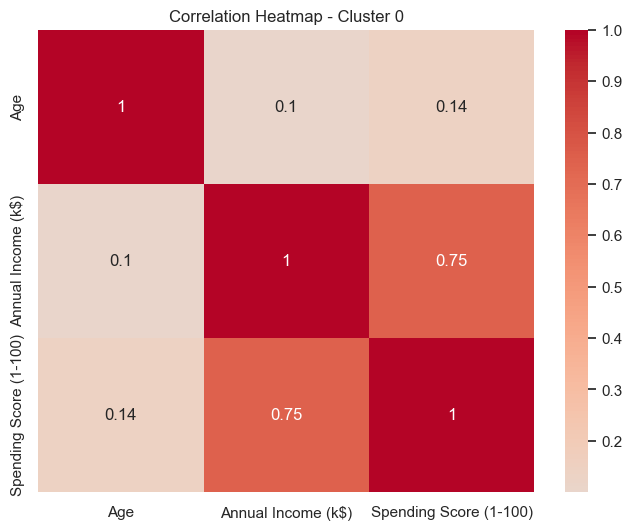

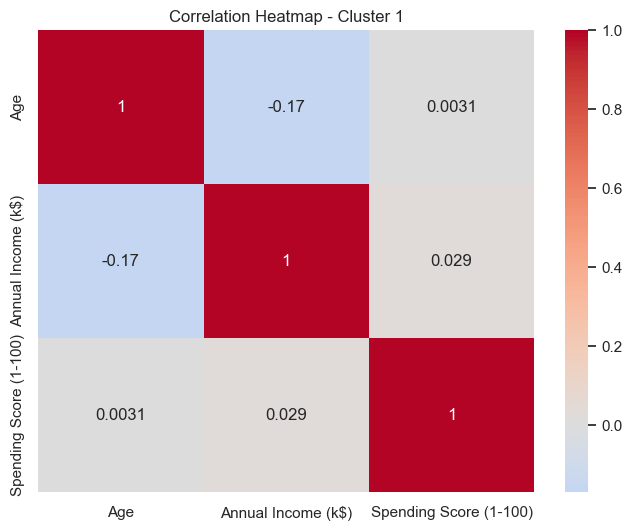

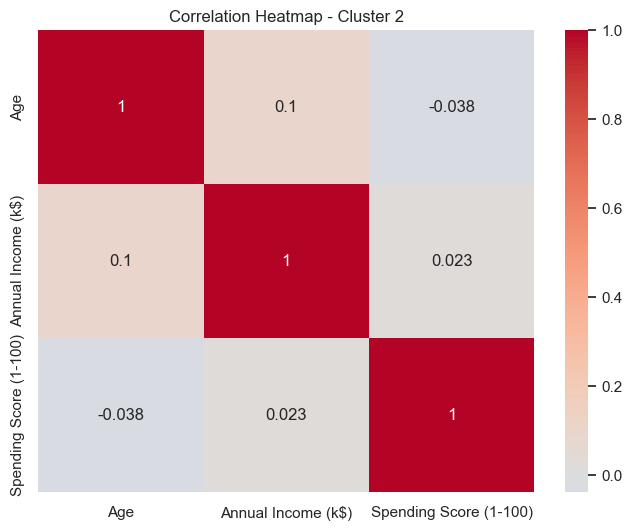

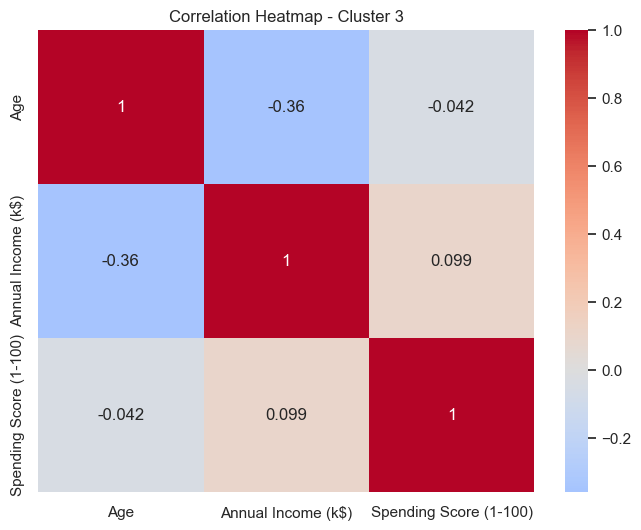

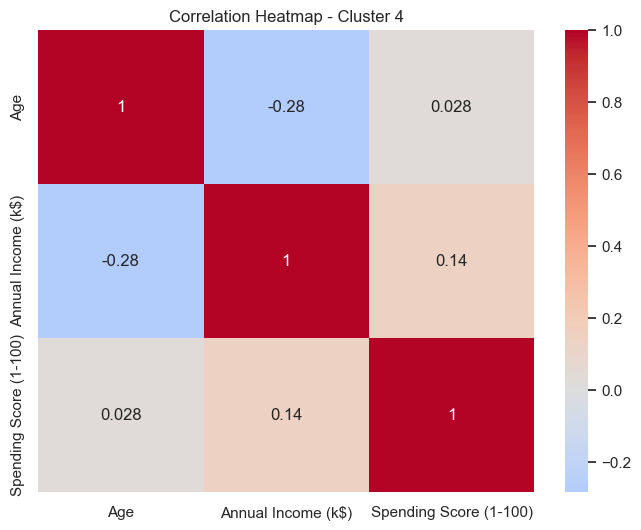

In [33]:
for cluster_id in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    corr_matrix = cluster_data[features].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap - Cluster {cluster_id}')
    plt.show()


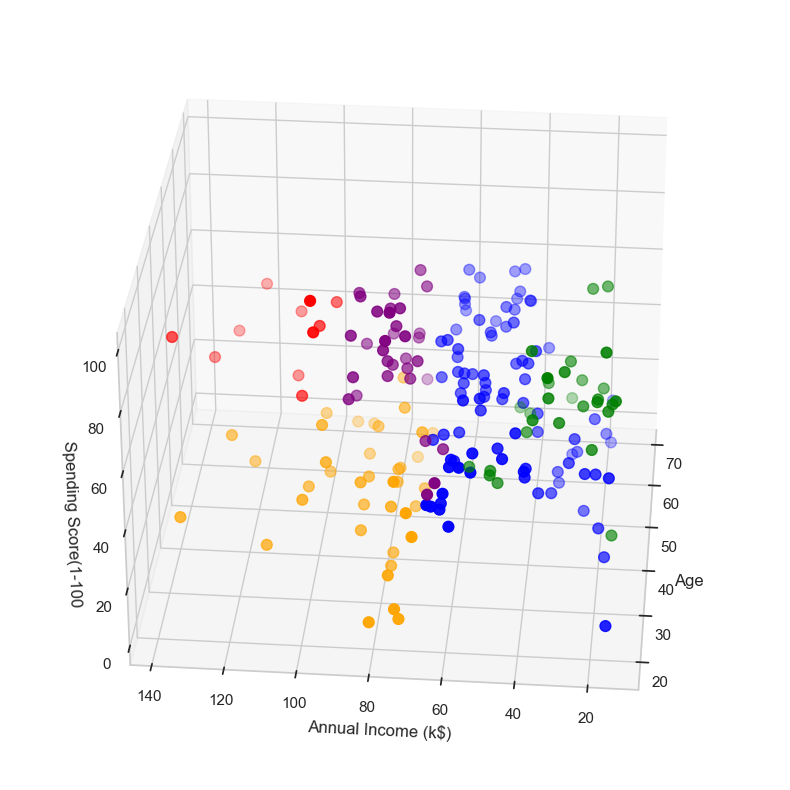

In [34]:
clusters = kmeans.fit_predict(X3)
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label ==0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label ==1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label ==2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label ==3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label ==4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score(1-100')

plt.show()